## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

#透過 preprocessing 轉換標籤
from sklearn import preprocessing
from sklearn.impute import KNNImputer

## 讀入資料

In [2]:
df_train = pd.read_csv("./D36-41 探索性資料分析 (EDA)_Dataset/Titanic_train.csv")

In [3]:
# 計算每一行是否有遺失值，計算遺失比例
missing_vals = pd.DataFrame(df_train.isnull().sum()/len(df_train), columns=['missing_rate'])
missing_vals.sort_values(by=['missing_rate'], ascending=False, inplace=True)
print(missing_vals)

             missing_rate
Cabin            0.771044
Age              0.198653
Embarked         0.002245
PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000


In [4]:
missing_index = df_train.isnull()
display(df_train[missing_index.values])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## 觀察 Age

In [5]:
print(df_train['Age'].describe()) # 檢視 Age 的描述
display(df_train[df_train['Age'].isnull()]) # 檢視 Age 的遺失值

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


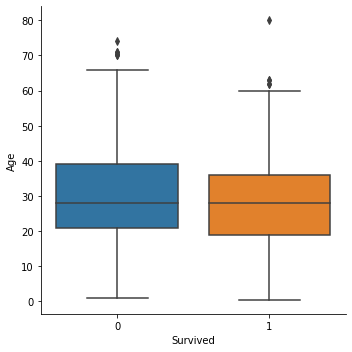

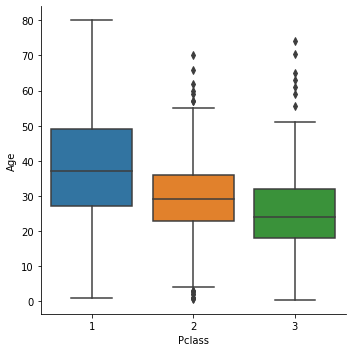

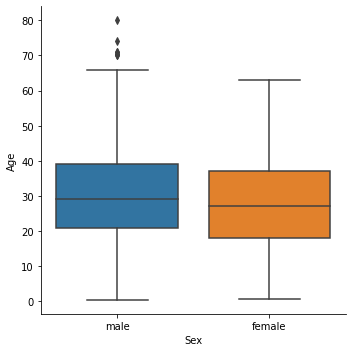

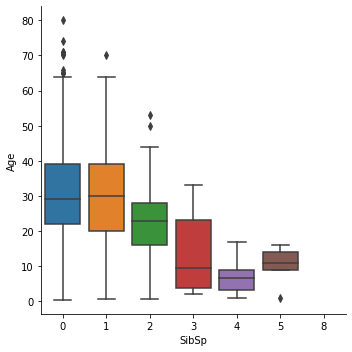

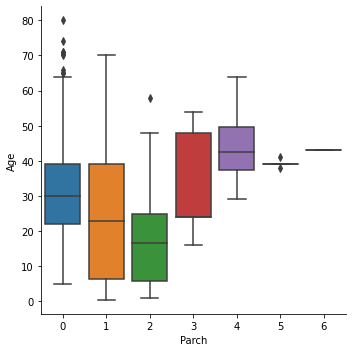

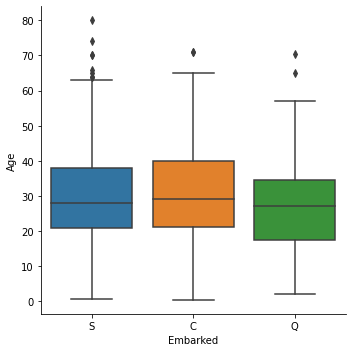

In [6]:
# 觀察 Age 與組群數小於8的各欄位的分布
for col in df_train.columns:
    if len(df_train.groupby(col)) < 8:
        g = sns.catplot(x=col, y="Age", data=df_train, kind="box")
        plt.show()

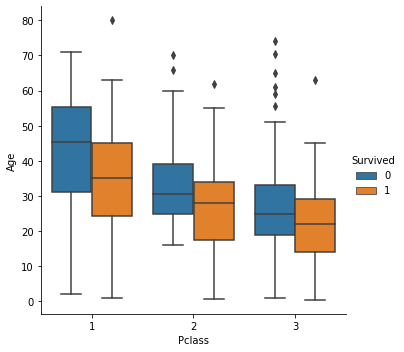

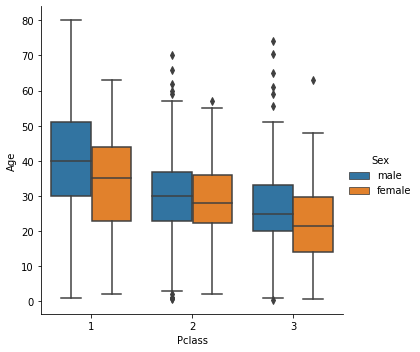

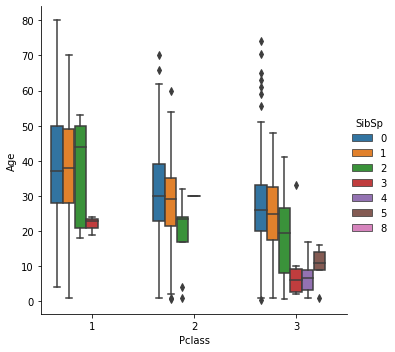

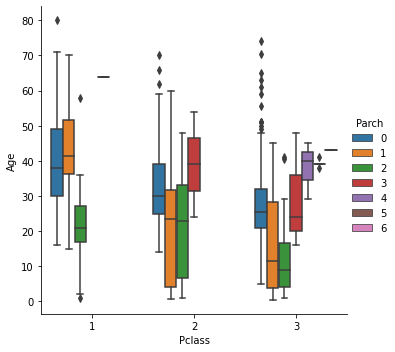

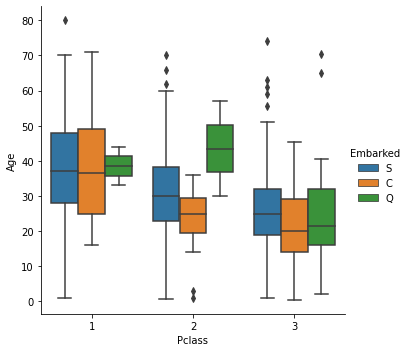

In [7]:
# 觀察到不同艙等的年紀不太相同
# 再觀察是否跟其他的因素有關

for col in df_train.columns:
    if len(df_train.groupby(col)) < 8 and col != 'Pclass':
        g = sns.catplot(x='Pclass' , y='Age', hue=col,  data=df_train, kind="box")
        plt.show()

,Age,Pclass,Survived,Sex
0,22.000000,3,0,male
2,26.000000,3,1,female
4,35.000000,3,0,male
5,19.666667,3,0,male
5,19.666667,3,0,male
...,...,...,...,...
885,39.000000,3,0,female
886,27.000000,2,0,male
888,17.666667,3,0,female
888,17.666667,3,0,female


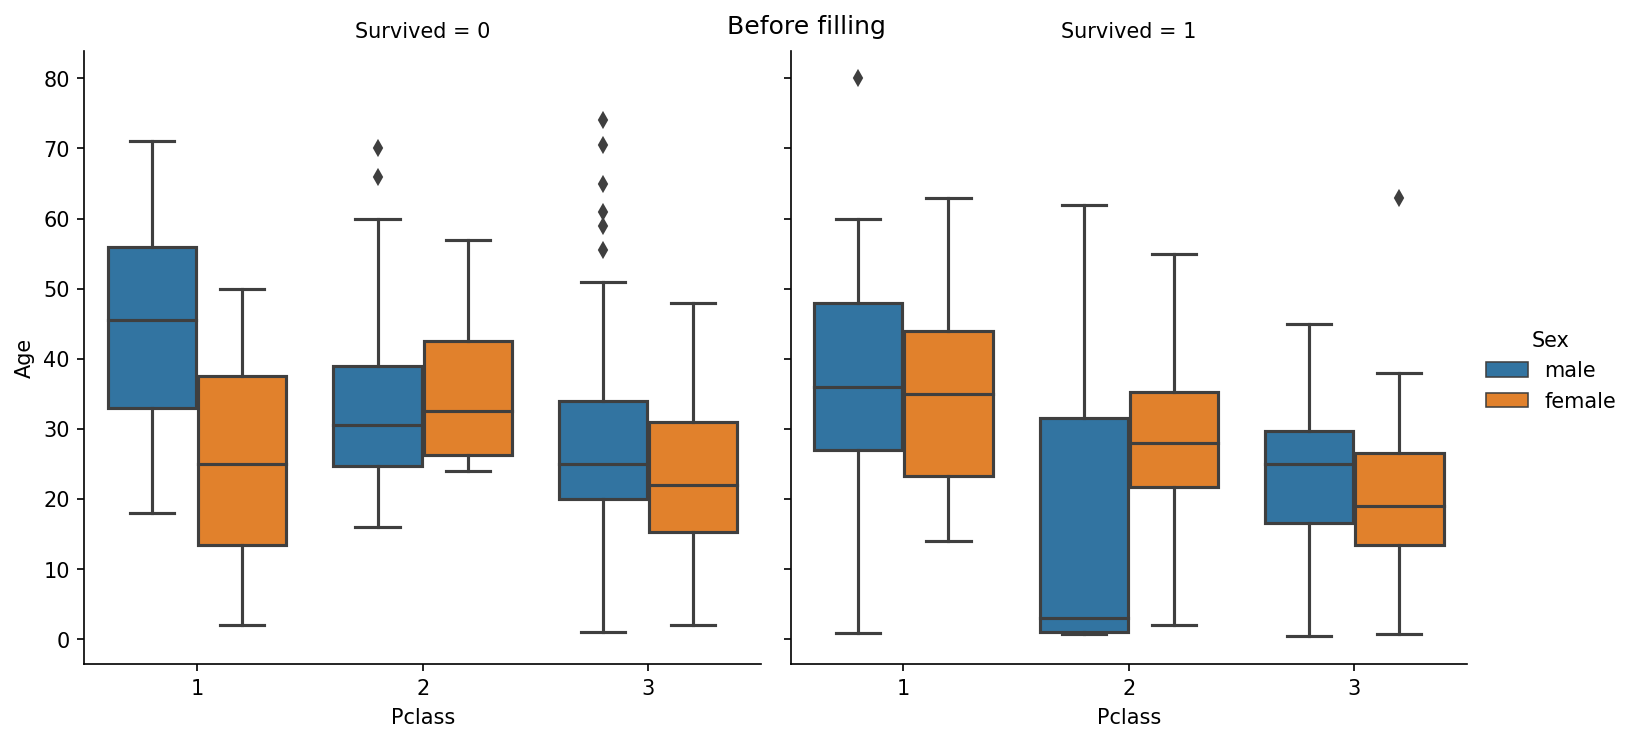

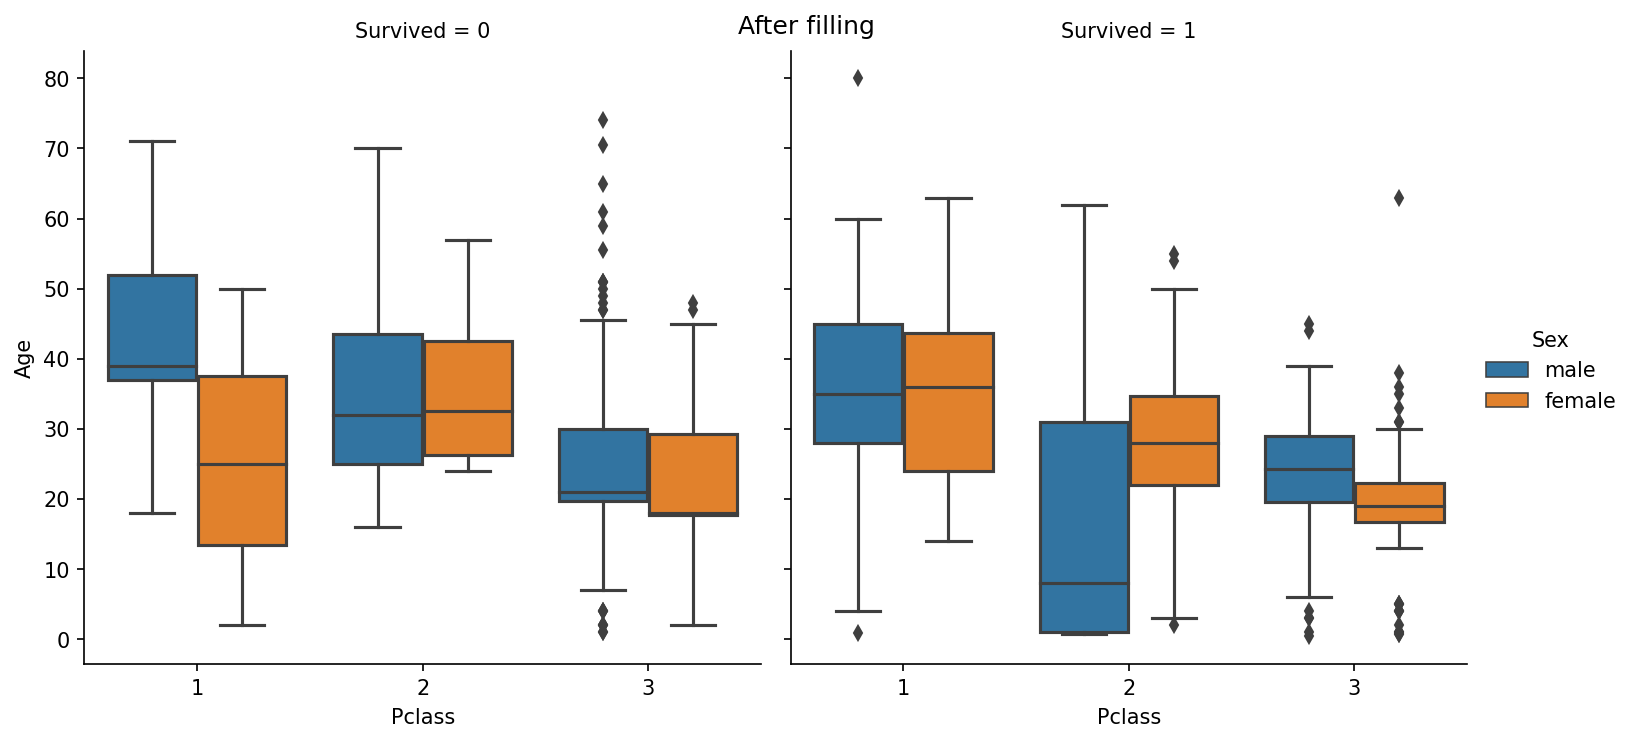

In [8]:
# 抓出相關因素進行補植
col_list=['Age','Pclass','Survived','Sex',]
data = df_train[col_list]

# 轉換資料為離散型
le = preprocessing.LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Pclass'] = le.fit_transform(data['Pclass'])

# 設定用多少鄰居資訊來補值
imputer = KNNImputer(n_neighbors = 3)

# 把資料放進去，進行補值
df_filled = pd.DataFrame(imputer.fit_transform(data))

# 恢復標籤資料並呈現補值的結果
df_filled.columns = col_list
for i in col_list:
    if i != 'Age':
        df_filled[i]=df_train[i]
display(df_filled[missing_index.values==True])

# 比較補值前後差異
plt.rcParams["figure.dpi"] = 150
for data in {'Before filling': df_train,
             'After filling': df_filled}.items():
    g = sns.catplot(x='Pclass' , y='Age', hue='Sex', col='Survived', data=data[1], kind="box")    
    plt.suptitle(str(data[0]))
    plt.show()